## Import des bibliothèques nécessaires :



In [1]:
#Taha Souhail Manna
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
%matplotlib inline

## Chargement du jeu de données depuis un fichier CSV :




In [2]:
# Taha Souhail Manna

df= pd.read_csv('mouse_viral_study.csv')

## Affichage des premières lignes du jeu de données :



In [3]:
#Taha Souhail Manna

df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## Extraction des caractéristiques (X) et de la variable cible (y) :



In [4]:
#Taha Souhail Manna

X = df[['Med_1_mL', 'Med_2_mL']].values
y = df[['Virus Present']].values

## Visualisation des données en utilisant un nuage de points avec coloration en fonction de la présence du virus :



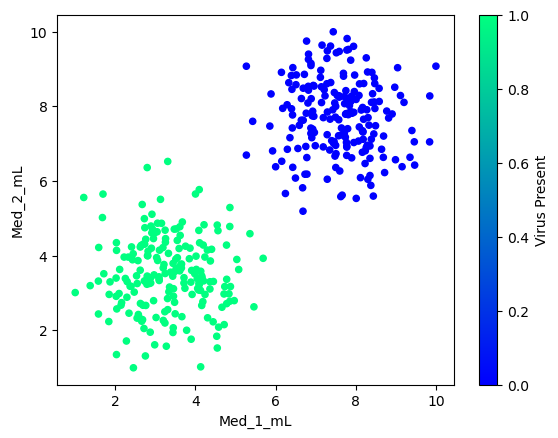

In [5]:
#Taha Souhail Manna

df.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

## Division des données en ensembles d'entraînement et de test :



In [6]:
#Taha Souhail Manna

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train  : ',X_train.shape)
print('y_train  : ',y_train.shape)
print('x_test : ',X_test.shape)
print('y_test : ',y_test.shape)

x_train  :  (320, 2)
y_train  :  (320, 1)
x_test :  (80, 2)
y_test :  (80, 1)


## Normalisation des données d'entraînement et de test :




In [7]:
#Taha Souhail Manna
xtrain_mean = np.mean(X_train,axis=0)
xtrain_std = np.std(X_train,axis=0)

X_train = (X_train - xtrain_mean)/xtrain_std
X_test = (X_test - xtrain_mean)/xtrain_std

## Définition de la fonction sigmoïde et des fonctions nécessaires à la régression logistique :



In [8]:
#Taha Souhail Manna
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
#Taha Souhail Manna
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [10]:
#Taha Souhail Manna
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [11]:
#Taha Souhail Manna
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [12]:
#Taha Souhail Manna
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [13]:
#Taha Souhail Manna
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [14]:
#Taha Souhail Manna
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [15]:
#Taha Souhail Manna
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

## Entraînement du modèle de régression logistique et affichage de l'évolution de la fonction de perte :



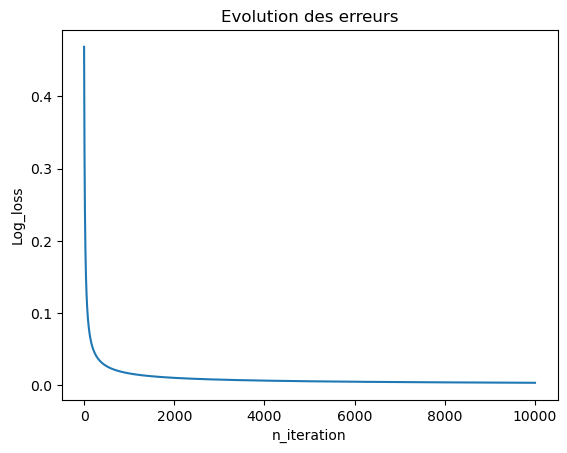

In [16]:
#Taha Souhail Manna
W,b=regression_logistique(X_train, y_train)

## Prédiction sur l'ensemble de test et calcul de l'accuracy :



In [17]:
#Taha Souhail Manna
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))


[[3.78971072e-04]
 [9.99897349e-01]
 [2.81162899e-04]
 [2.56899386e-06]
 [9.98884730e-01]
 [3.30886616e-06]
 [8.86690376e-04]
 [9.99539894e-01]
 [9.99592996e-01]
 [3.49466825e-05]
 [9.99337059e-01]
 [9.99631181e-01]
 [3.67734126e-05]
 [3.64731228e-05]
 [9.99935893e-01]
 [9.95755108e-01]
 [9.97114419e-01]
 [9.36005396e-05]
 [9.82346597e-01]
 [2.24286116e-04]
 [9.99987587e-01]
 [4.47573912e-06]
 [5.25098639e-06]
 [8.72910079e-04]
 [1.36083041e-04]
 [3.37356972e-06]
 [5.40708042e-07]
 [9.99995282e-01]
 [6.32109844e-04]
 [6.34685998e-05]
 [9.99973126e-01]
 [8.50880844e-01]
 [9.99979796e-01]
 [1.43587362e-05]
 [1.20862268e-04]
 [2.18758960e-05]
 [9.26423827e-01]
 [9.99773825e-01]
 [1.29800447e-03]
 [7.22965591e-04]
 [9.99417858e-01]
 [2.66508957e-05]
 [9.99877092e-01]
 [1.08362412e-04]
 [4.59326154e-06]
 [9.99845395e-01]
 [9.67763889e-04]
 [9.99998289e-01]
 [5.69757036e-07]
 [2.15088265e-06]
 [9.99611952e-01]
 [9.97369679e-01]
 [1.27380556e-05]
 [9.99964768e-01]
 [2.22124902e-04]
 [9.999488

## Visualisation de la frontière de décision et prédictions pour de nouveaux éléments :


[0.25327827]
[False]
[0.00801038]
[False]
[0.00015807]
[False]


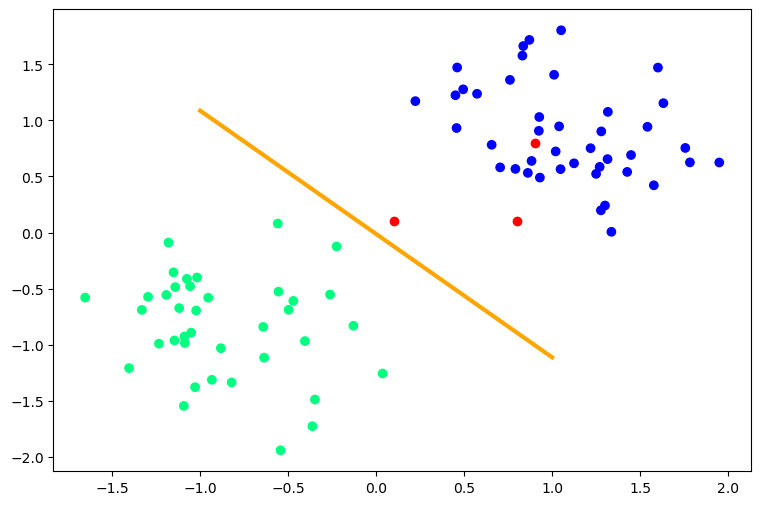

In [18]:
#Taha Souhail Manna
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(1, -1, 10)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments
new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

## Affichage de la matrice de confusion :



In [19]:
#Taha Souhail Manna
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3.78971072e-04]
 [9.99897349e-01]
 [2.81162899e-04]
 [2.56899386e-06]
 [9.98884730e-01]
 [3.30886616e-06]
 [8.86690376e-04]
 [9.99539894e-01]
 [9.99592996e-01]
 [3.49466825e-05]
 [9.99337059e-01]
 [9.99631181e-01]
 [3.67734126e-05]
 [3.64731228e-05]
 [9.99935893e-01]
 [9.95755108e-01]
 [9.97114419e-01]
 [9.36005396e-05]
 [9.82346597e-01]
 [2.24286116e-04]
 [9.99987587e-01]
 [4.47573912e-06]
 [5.25098639e-06]
 [8.72910079e-04]
 [1.36083041e-04]
 [3.37356972e-06]
 [5.40708042e-07]
 [9.99995282e-01]
 [6.32109844e-04]
 [6.34685998e-05]
 [9.99973126e-01]
 [8.50880844e-01]
 [9.99979796e-01]
 [1.43587362e-05]
 [1.20862268e-04]
 [2.18758960e-05]
 [9.26423827e-01]
 [9.99773825e-01]
 [1.29800447e-03]
 [7.22965591e-04]
 [9.99417858e-01]
 [2.66508957e-05]
 [9.99877092e-01]
 [1.08362412e-04]
 [4.59326154e-06]
 [9.99845395e-01]
 [9.67763889e-04]
 [9.99998289e-01]
 [5.69757036e-07]
 [2.15088265e-06]
 [9.99611952e-01]
 [9.97369679e-01]
 [1.27380556e-05]
 [9.99964768e-01]
 [2.22124902e-04]
 [9.999488

## Visualisation de la matrice de confusion à l'aide d'un heatmap :


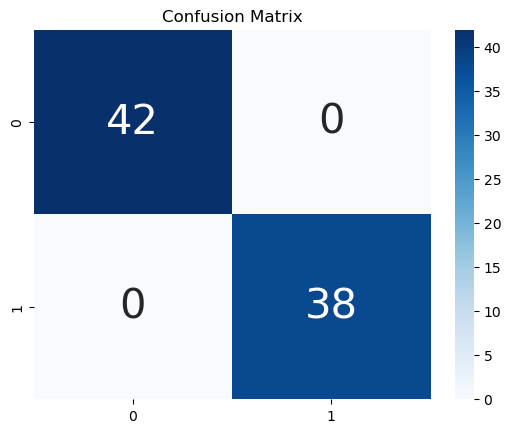

In [20]:
#Taha Souhail Manna
# Plot confusion matrix
import seaborn as sns
import pandas as pd

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()